## <font color='#475468'> IE 423 Final Exam </font>
### <font color='#475468'> Analyzing online shoppers intention dataset, generating insights, and building machine learning models to predict whether a visitor to an online shopping website will make a purchase based on various features of their visit. </font>

## Initialize

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dfTips = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/online_shoppers_intention.csv')

In [4]:
dfTips.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Let's create a pairplot to see whether we can come up to some conclusions.

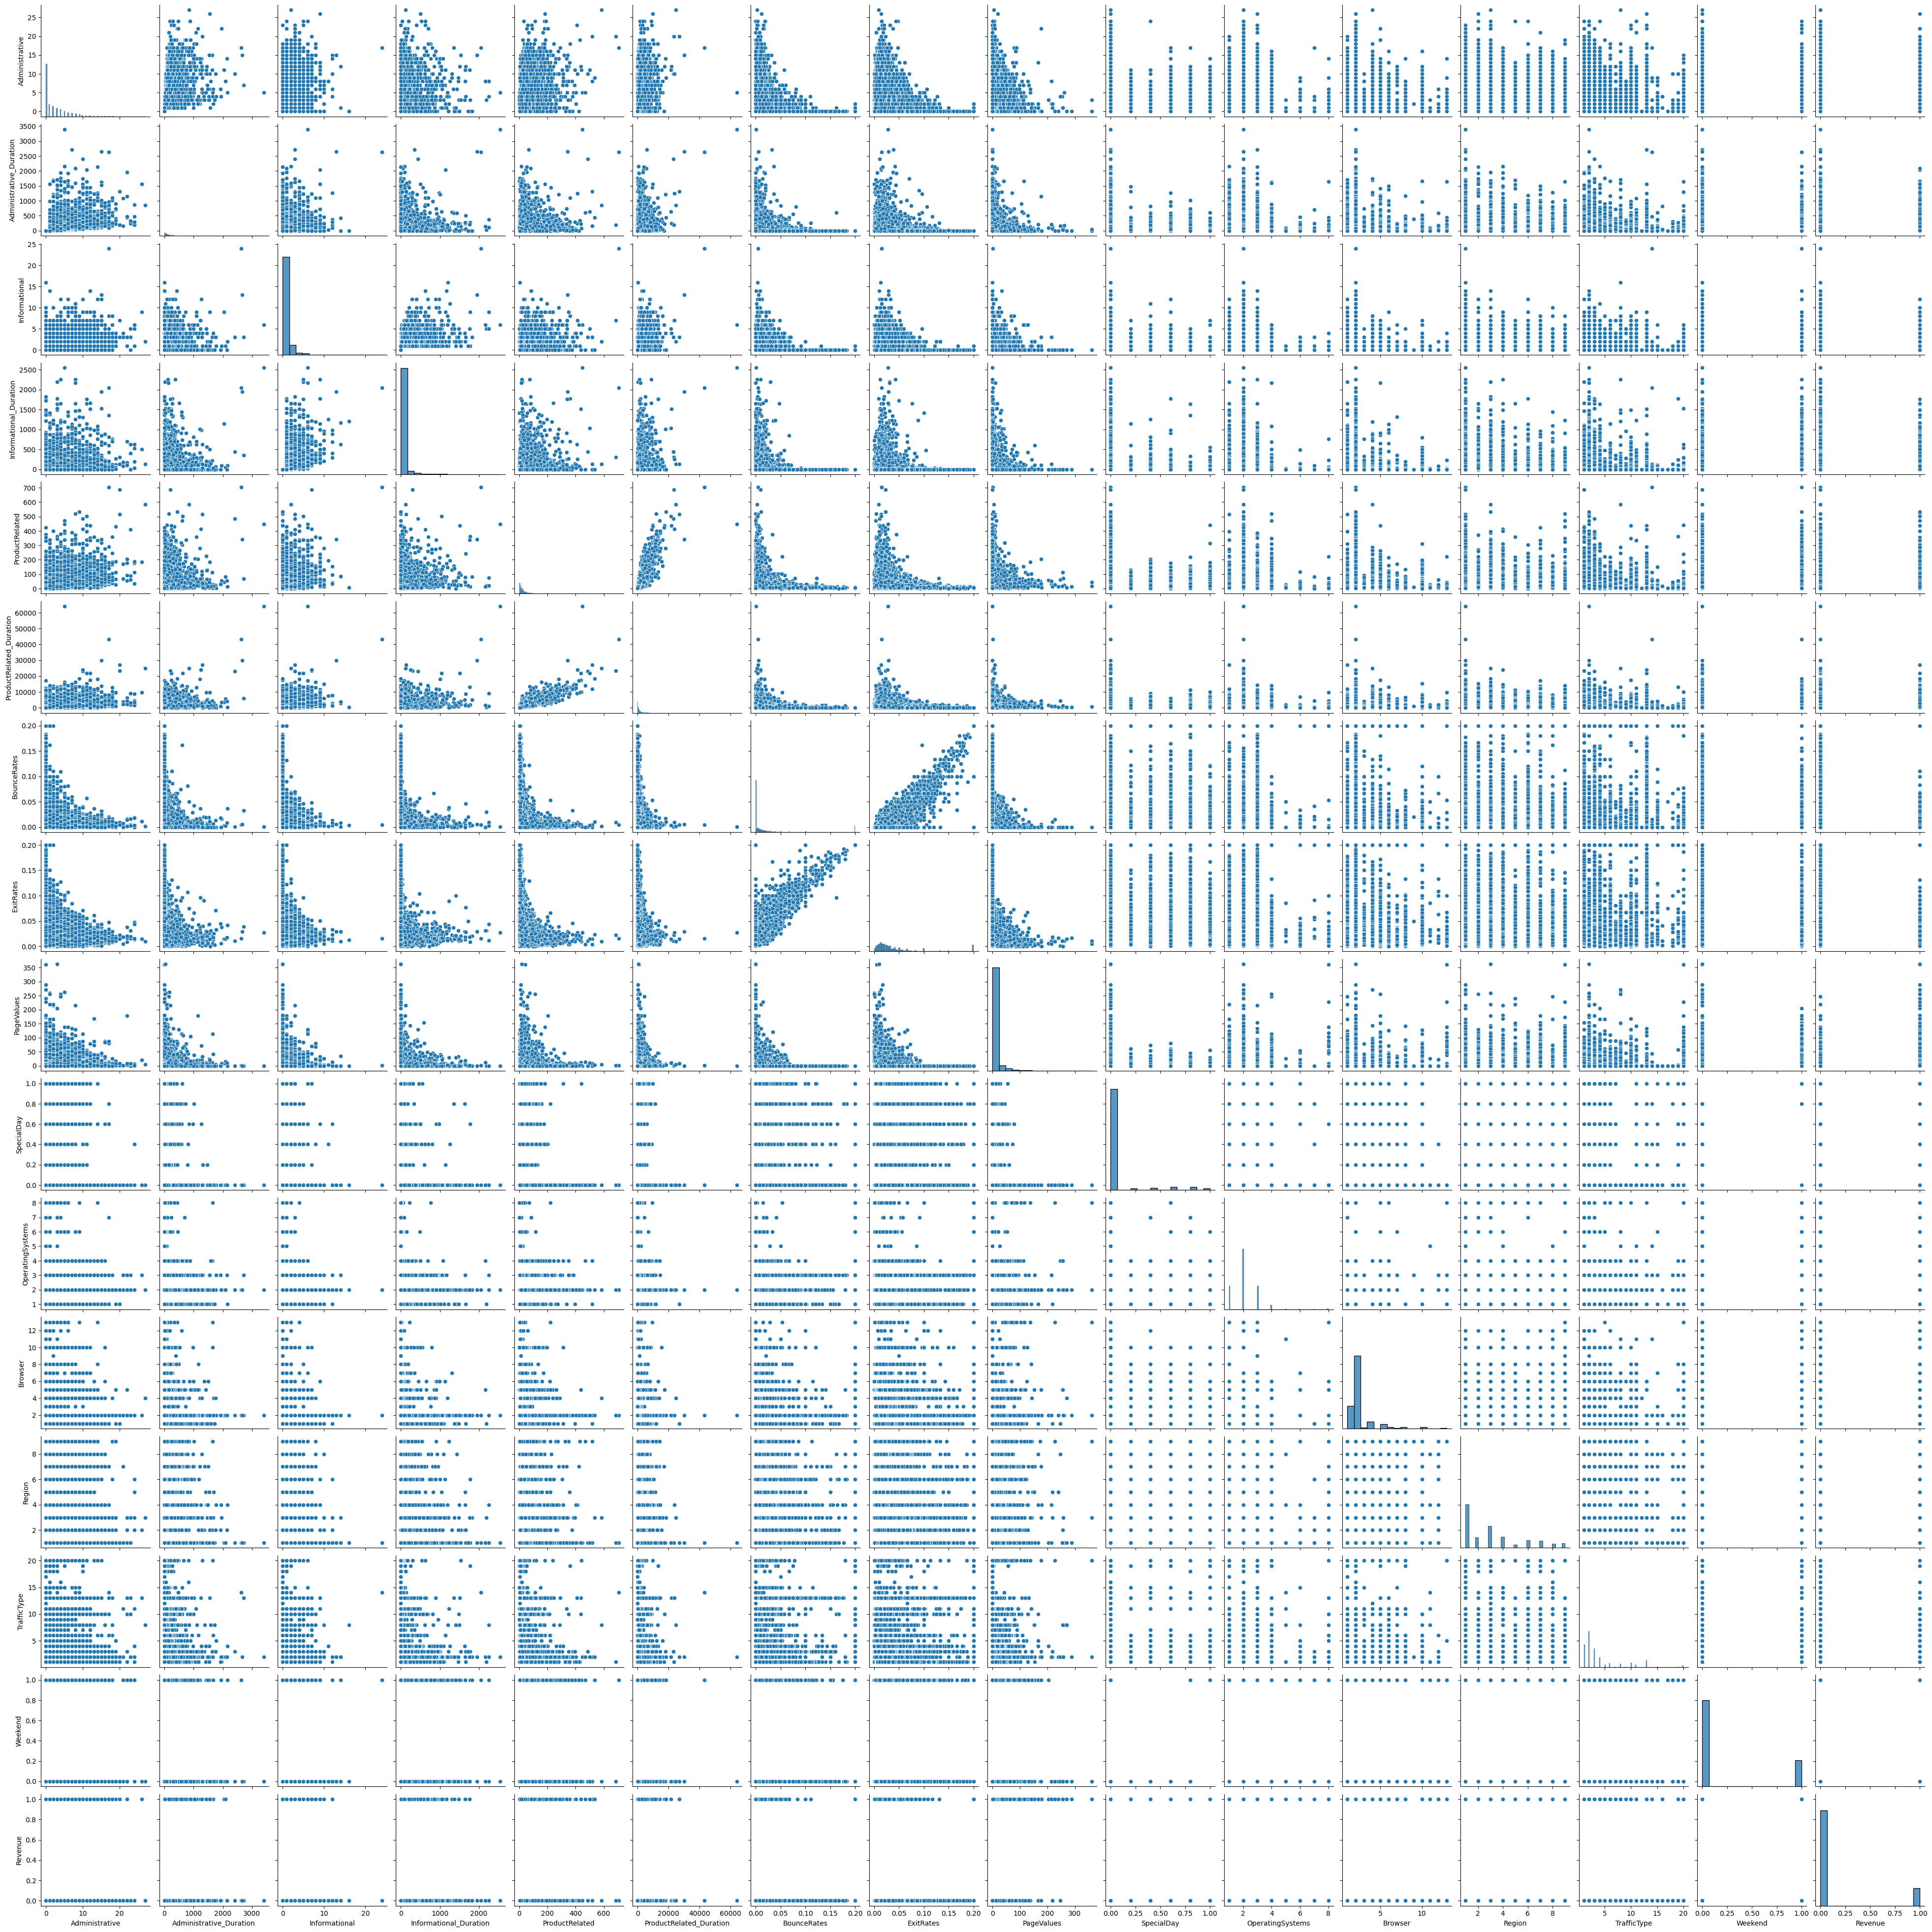

In [5]:
sns.pairplot(dfTips)

Let's see the frequency of variables in each column.

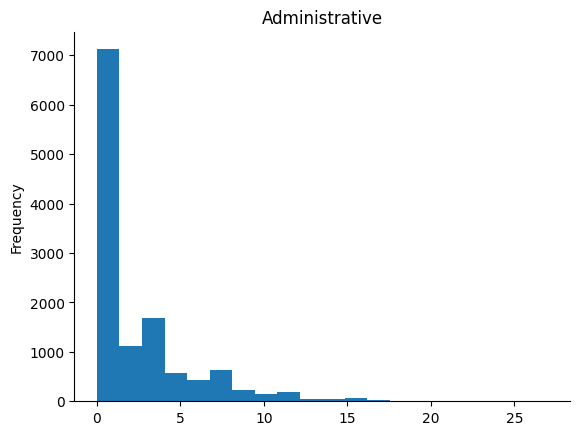

In [6]:
from matplotlib import pyplot as plt
dfTips['Administrative'].plot(kind='hist', bins=20, title='Administrative')
plt.gca().spines[['top', 'right',]].set_visible(False)

A big part of the users do not visit administrative pages at all.

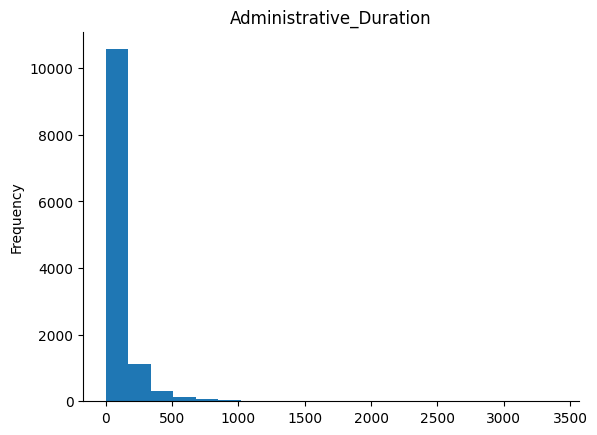

In [7]:
dfTips['Administrative_Duration'].plot(kind='hist', bins=20, title='Administrative_Duration')
plt.gca().spines[['top', 'right',]].set_visible(False)

Since a big part of the users do not visit the administrative page at all, the duration spend here is mostly zero.

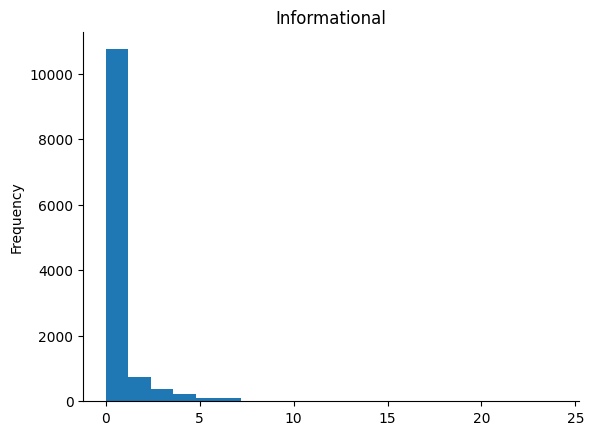

In [8]:
dfTips['Informational'].plot(kind='hist', bins=20, title='Informational')
plt.gca().spines[['top', 'right',]].set_visible(False)

Similar to the administrative column, most of the users do not visit information page at all.

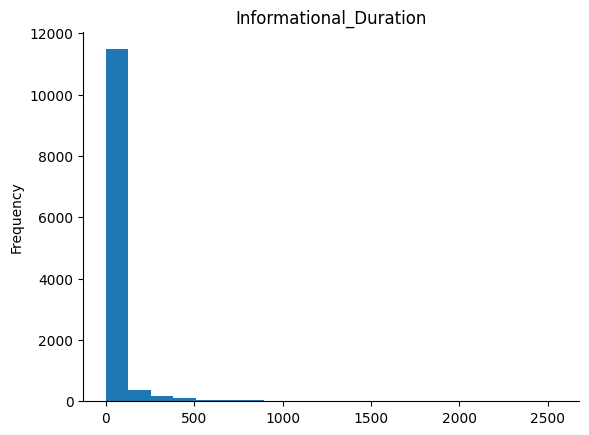

In [9]:
dfTips['Informational_Duration'].plot(kind='hist', bins=20, title='Informational_Duration')
plt.gca().spines[['top', 'right',]].set_visible(False)

Since a big part of the users do not visit the informational page at all, the duration spend here is mostly zero.

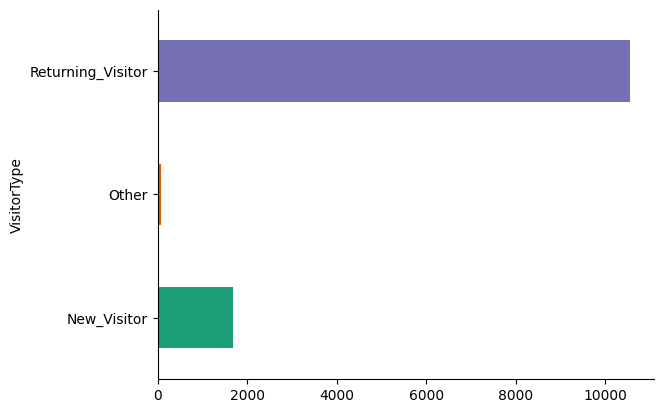

In [10]:
dfTips.groupby('VisitorType').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Seems like most of the visitors already visited the website before. Only a small amount of visitors are new to the website.

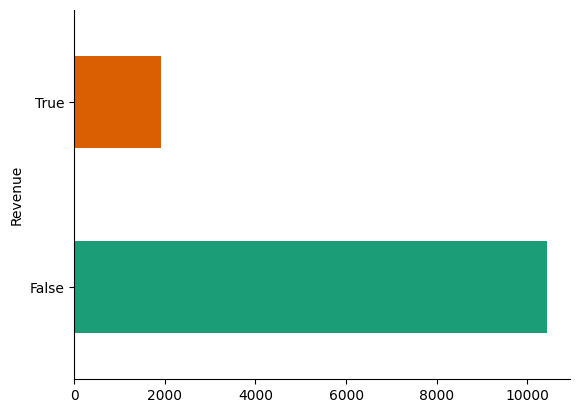

In [11]:
dfTips.groupby('Revenue').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Most of the visits do not end with a purchase.

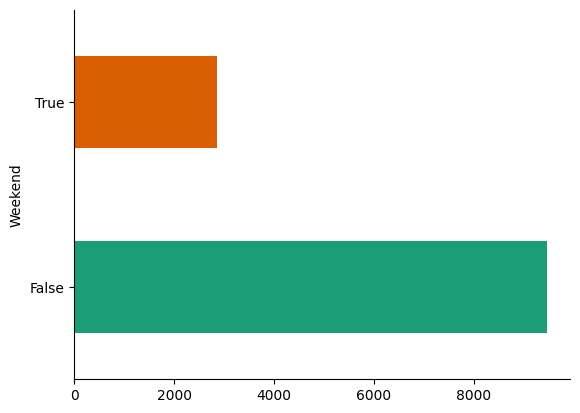

In [12]:
dfTips.groupby('Weekend').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Most people do not visit the website on the weekends.

<Axes: ylabel='count'>

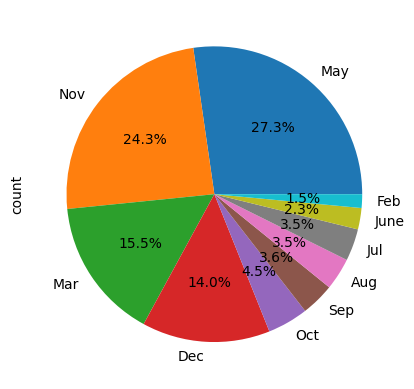

In [13]:
dfTips.Month.value_counts().plot.pie(autopct = "%1.1f%%")

Seems like the website is the most active during summer and in january (maybe because of new years eve? or maybe prices mostly change starting from the first day of the new year)

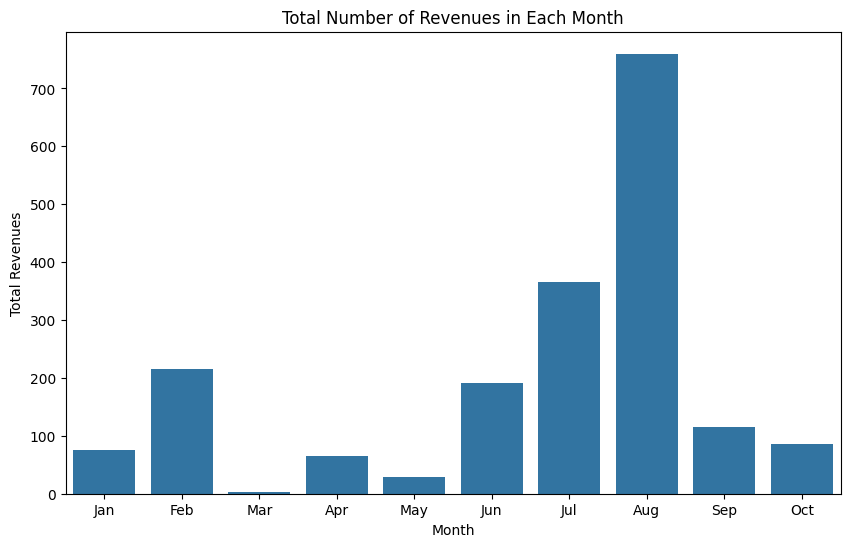

In [14]:
monthly_revenue_counts = dfTips[dfTips['Revenue'] == 1].groupby('Month').size().reset_index(name='Count')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_revenue_counts, x='Month', y='Count')
plt.title('Total Number of Revenues in Each Month')
plt.xlabel('Month')
plt.ylabel('Total Revenues')
plt.xticks(range(10), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'])
plt.show()

Seems like we get the most revenues in August, followed by July and June. Considering the fact that the website is most active during summer, it is normal to generate more money compared to other months.
I also see that February generates good amount of money as well. Maybe because of Valentines Day?

It's confusing however, considering january is an active month but it generates low revenue.

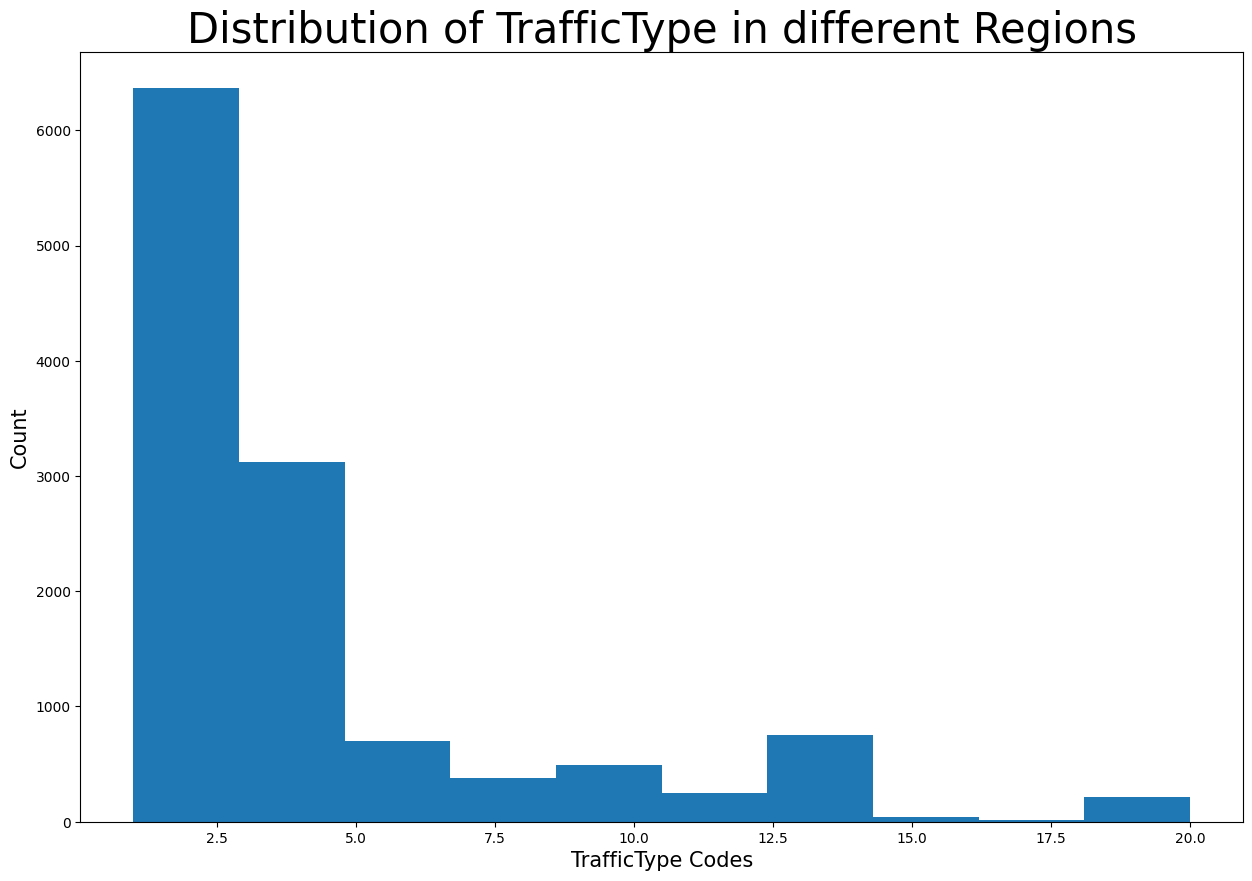

In [92]:
# visualizing the distribution of customers around the Region

plt.rcParams['figure.figsize'] = (15, 10)
plt.hist(dfTips['TrafficType'])
plt.title('Distribution of TrafficType in different Regions',fontsize = 30)
plt.xlabel('TrafficType Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

TrafficType is most frequent around 2.5.

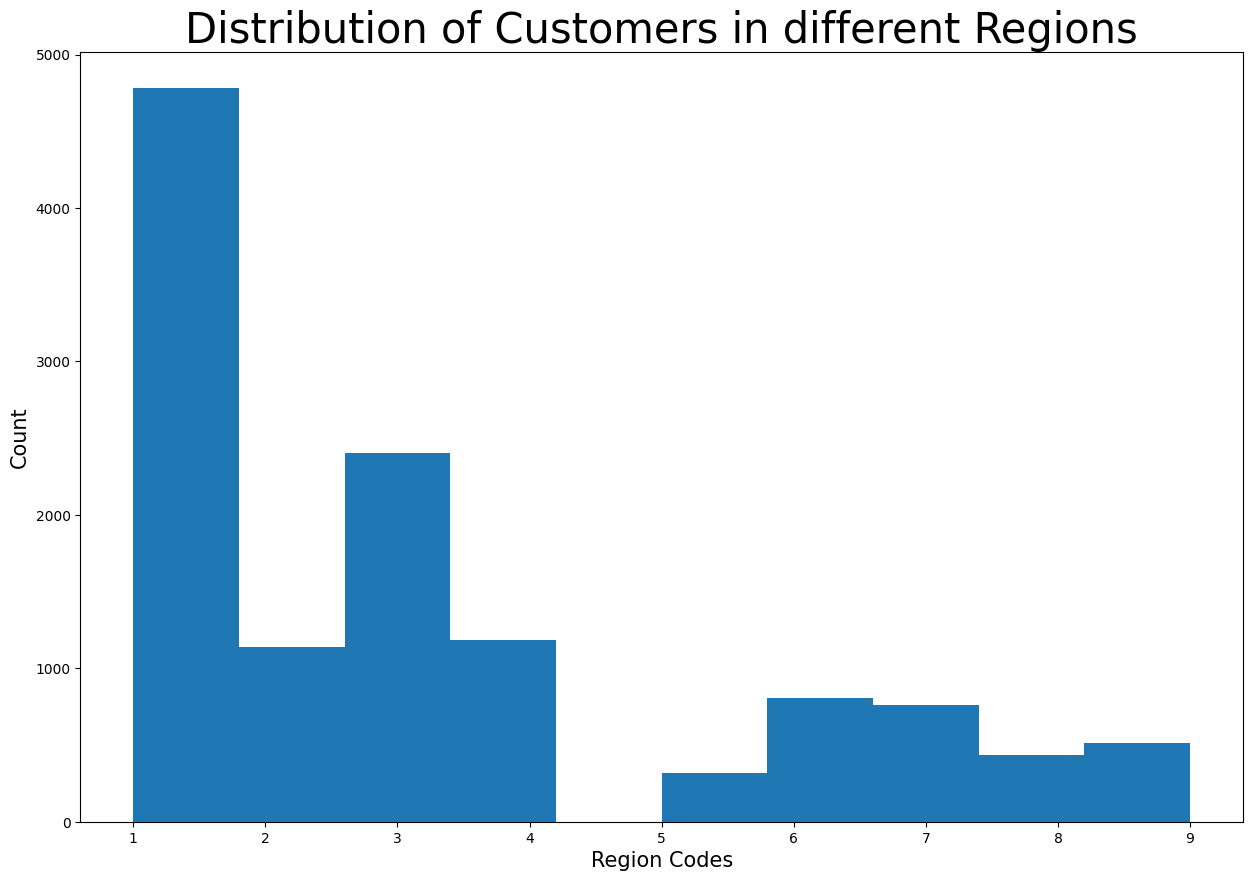

In [93]:
# visualizing the distribution of customers around the Region

plt.rcParams['figure.figsize'] = (15, 10)
plt.hist(dfTips['Region'])
plt.title('Distribution of Customers in different Regions',fontsize = 30)
plt.xlabel('Region Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

Most of our customers are from region 1 and 3.

In [15]:
dfTips.nunique()

,0
Administrative,27
Administrative_Duration,3335
Informational,17
Informational_Duration,1258
ProductRelated,311
ProductRelated_Duration,9551
BounceRates,1872
ExitRates,4777
PageValues,2704
SpecialDay,6


Seems like Revenue is the only binary column.

In [16]:
dfTips.isna().sum()

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


We do not have any missing values.

In [88]:
dfTips.dtypes

,0
Administrative,int64
Administrative_Duration,float64
Informational,int64
Informational_Duration,float64
ProductRelated,int64
ProductRelated_Duration,float64
BounceRates,float64
ExitRates,float64
PageValues,float64
SpecialDay,float64


So we do not have any categorical values.

In [89]:
dfTips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int64  
 11  OperatingSystems         12330 non-null  int64  
 12  Region                   12330 non-null  int64  
 13  TrafficType              12330 non-null  int64  
 14  VisitorType           

So we have 12330 rows in total.

In [17]:
dfTips.corr(numeric_only=True)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301,-0.016767,-0.082305


It's a bit confusing, let's visualize it to see the higher correlations better.

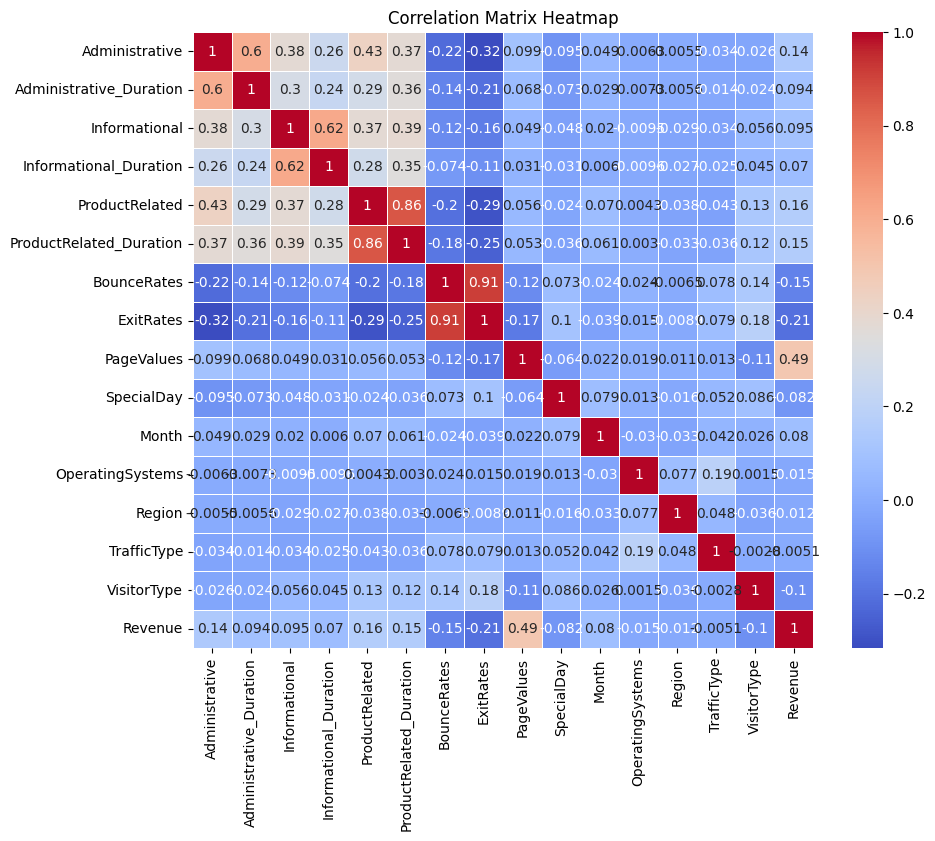

In [76]:
# Calculate the correlation matrix
corr = dfTips.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Revenue has a pretty high correlation with page values. The rest of the values have low correlation.
Seems like the correlation of browser and weekend with Revenue is so low that we can reject the hypothesis that they are correlated with Revenue. Let's double check.

In [18]:
def correlation(dataframe, target):
    from scipy import stats
    """
    Takes dataframe and target feature as parameter
    Returns the correlation between numeric columns and target"""

    output_dataframe = pd.DataFrame(columns = ["Columns","P-Value","Correlation Coefficient(r)","Absolute r"])
    for col in dataframe.drop(target,axis = 1):
        try:
            if pd.api.types.is_numeric_dtype(dataframe[col]):
                r, p = stats.pearsonr(dataframe[col],dataframe[target])
                output_dataframe.loc[col] = [f"{target}-{col}",round(p,4),r,abs(r)]
            else:
                pass
        except:
            pass

    return output_dataframe.sort_values(by = ["Absolute r"],ascending = False)

correlation(dfTips, "Revenue")

,Columns,P-Value,Correlation Coefficient(r),Absolute r
PageValues,Revenue-PageValues,0.0000,0.492569,0.492569
ExitRates,Revenue-ExitRates,0.0000,-0.207071,0.207071
ProductRelated,Revenue-ProductRelated,0.0000,0.158538,0.158538
ProductRelated_Duration,Revenue-ProductRelated_Duration,0.0000,0.152373,0.152373
BounceRates,Revenue-BounceRates,0.0000,-0.150673,0.150673
Administrative,Revenue-Administrative,0.0000,0.138917,0.138917
Informational,Revenue-Informational,0.0000,0.095200,0.095200
Administrative_Duration,Revenue-Administrative_Duration,0.0000,0.093587,0.093587
SpecialDay,Revenue-SpecialDay,0.0000,-0.082305,0.082305
Informational_Duration,Revenue-Informational_Duration,0.0000,0.070345,0.070345


In [19]:
# Drop the 'weekend' column
dfTips = dfTips.drop(columns=['Weekend', 'Browser'])


In [20]:
dfTips.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Region,TrafficType,VisitorType,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,3,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,Returning_Visitor,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,10551,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,3.147364,4.069586,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,2.401591,4.025169,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,1.000000,2.000000,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,3.000000,2.000000,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,4.000000,4.000000,NaN,NaN


We'll fit classification models since the target variable "Revenue" consists of binary values of 'True' and 'False'. Rest of the columns are all numerical.

## Logistic Regression

In [57]:
# Scale data to eliminate the effect of feature units (especially for gradient descent cases)
from sklearn.preprocessing import scale
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

cols_cat = [col for col in dfTips.columns if dfTips[col].dtype == 'object']

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in cols_cat:
    dfTips[col] = label_encoder.fit_transform(dfTips[col])
y = dfTips['Revenue']
X = scale(dfTips.drop(['Revenue'], axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8, test_size=0.2,random_state=1)

In [22]:
# Build Logistic Regression model
from sklearn.linear_model import LogisticRegression



mdlLgr = LogisticRegression(random_state=1)
mdlLgr.fit(X_train, y_train)
y_test_pred = mdlLgr.predict(X_test)

We'll draw out a confusion matrix because since the target variable is binary (not linear), we can't directly calculate the error.

In [23]:
# Display model results using
from sklearn.metrics import confusion_matrix

print ('Confusion Matrix:')
print (confusion_matrix(y_test, y_test_pred))

Confusion Matrix:
[[2064   51]
 [ 218  133]]


## Metric 1: F1-score

The F1-score is simply the harmonic mean of the precision and recall.

In [24]:
# Display performance results
from sklearn.metrics import classification_report

print ('Classification Report (Logistic Regression):')
print (classification_report(y_test, y_test_pred))

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

       False       0.90      0.98      0.94      2115
        True       0.72      0.38      0.50       351

    accuracy                           0.89      2466
   macro avg       0.81      0.68      0.72      2466
weighted avg       0.88      0.89      0.88      2466



The overall accuracy of the model is 89%, meaning that 89% of the total predictions are correct.

<Axes: >

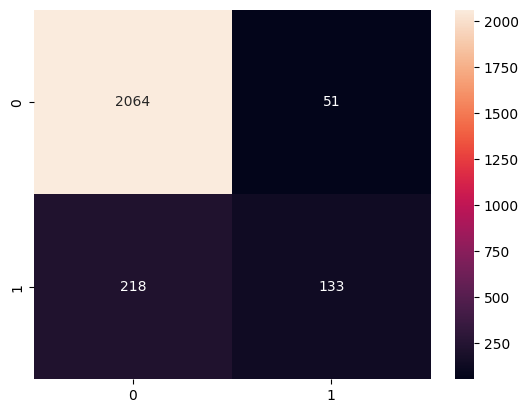

In [25]:
sns.heatmap(confusion_matrix(y_test, mdlLgr.predict(X_test)), annot = True, fmt = "d")

As expected, it is easy to predict 0 hence our model mostly predicted 0 losing a big part of the 1s. Also classification report indicates low recall and precision scores for 1. Which is expected. Lets play with the threshold and see if we can find a better solution.

In [26]:
thresholds = np.arange(0.01,0.99,0.01)

In [28]:
from sklearn.metrics import roc_auc_score
best_score_lg = 0.01
for threshold in thresholds:
  y_pred = (mdlLgr.predict_proba(X_test)[:,1]>=threshold)
  # Call the roc_auc_score function
  roc = roc_auc_score(y_test, y_pred)
  if roc > best_score_lg:
    best_score_lg = roc
    best_threshold = threshold
print(f"Best threshold: {best_threshold}")
print(f"Best roc_auc_score: {best_score_lg}")

Best threshold: 0.15000000000000002
Best roc_auc_score: 0.8234345638600957


In [29]:
roc_auc_score(y_test, mdlLgr.predict_proba(X_test)[:,1]>=0.15)

0.8234345638600957

<Axes: >

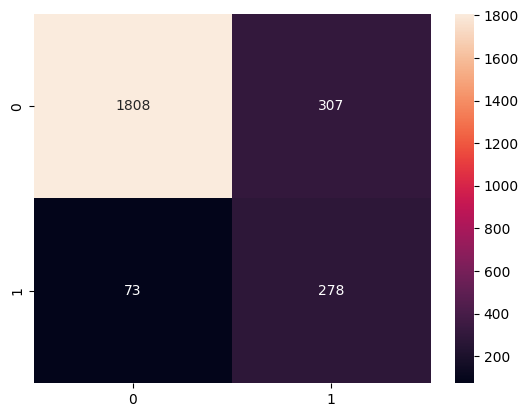

In [30]:
sns.heatmap(confusion_matrix(y_test, mdlLgr.predict_proba(X_test)[:,1]>=0.15), annot = True, fmt = "d")

In [31]:
print(classification_report(y_test, mdlLgr.predict_proba(X_test)[:,1]>=0.15))

              precision    recall  f1-score   support

       False       0.96      0.85      0.90      2115
        True       0.48      0.79      0.59       351

    accuracy                           0.85      2466
   macro avg       0.72      0.82      0.75      2466
weighted avg       0.89      0.85      0.86      2466



Accuracy = 0.85

AUC = 0.82

F-1 Score of 1s = 0.59

Although we are able to almost determine 90% of revenue, we are also mispredicting almost 20% of non revenues as revenues.

In [32]:
print('Number of Revenue variables that have value 0: ',dfTips[dfTips['Revenue'] == 0].shape[0])
print('Number of Revenue variables that have value 1: ',dfTips[dfTips['Revenue'] == 1].shape[0])

Number of Revenue variables that have value 0:  10422
Number of Revenue variables that have value 1:  1908


The failure in accurately classifying data points whose Revenue values equal to 1 can be attributed to the unbalanced nature of the dataset. As it can be seen, data points that have a label of 1 are almost 1/5 th of the entire dataset. Hence the model expectedly does a worse job at predicting those values.

In [33]:
# Display summary results
from sklearn.metrics import roc_auc_score

print ('AUC Score (Logistic Regression):')
print (roc_auc_score(y_test, y_test_pred))

AUC Score (Logistic Regression):
0.6774019518700369


AUC score is 67%, meaning that the model does little (it was going to be random if it was 50%, which would mean the model does just a bit). We'll try to improve on this model.

# Naive Bayes - Gaussian
Naive Bayes is a probabilistic model that uses Bayes Theorem to predict probability of target value given features based on the probability of features given the target.

In [34]:
# Build Naive Bayes - Gaussian model
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score

mdlNbg = GaussianNB()
mdlNbg.fit(X_train,y_train)
y_test_pred = mdlNbg.predict(X_test)

print ('Results (Naive Bayes - Gaussian):\n')

print ('Classification Report:')
print (classification_report(y_test, y_test_pred))

print ('AUC Score:')
print (roc_auc_score(y_test, y_test_pred))

print(f"F-1 Score: {f1_score(y_test, y_test_pred)}")

Results (Naive Bayes - Gaussian):

Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.82      0.88      2115
        True       0.39      0.71      0.51       351

    accuracy                           0.80      2466
   macro avg       0.67      0.76      0.69      2466
weighted avg       0.87      0.80      0.82      2466

AUC Score:
0.7641571194762684
F-1 Score: 0.5066124109867751


<Axes: >

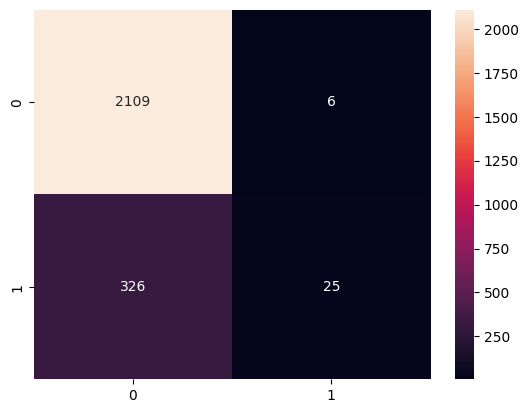

In [35]:
  sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = "d")

In [36]:
# Lets optimize the threshold
best_score_nb = 0.01
for threshold in thresholds:
  y_pred = (mdlNbg.predict_proba(X_test)[:,1]>=threshold)
  # Call the roc_auc_score function
  roc = roc_auc_score(y_test, y_pred)
  if roc > best_score_nb:
    best_score_nb = roc
    best_threshold = threshold
print(f"Best threshold: {best_threshold}")
print(f"Best roc_auc_score: {best_score_nb}")


Best threshold: 0.32
Best roc_auc_score: 0.7707340728617325


<Axes: >

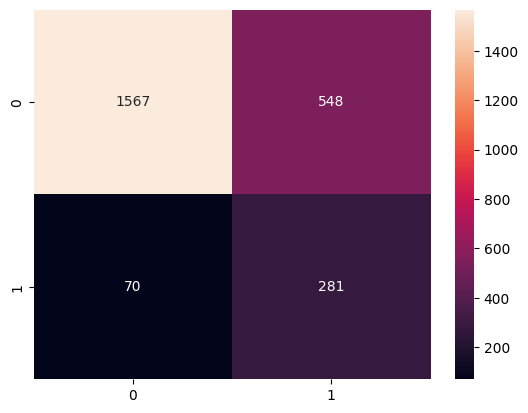

In [37]:
sns.heatmap(confusion_matrix(y_test, mdlNbg.predict_proba(X_test)[:,1]>=0.32), annot = True, fmt = "d")

Our AUC become 0.77 with a slight increase with optimization.

However, the AUC score improved significantly. I conclude that features are independent of each other mostly, based on the fact that naive bayes performed better than logistic regression and also from the inconclusiveness of the pairplot.

# K-Nearest Neighbor (KNN)
This is yet another way of getting to a similar outcome, but this time using cartesian distances to determine how close or far a new data point is to the previous data points.

In [38]:
# Build KNN model with 5 nearest neighbors
from sklearn.neighbors import KNeighborsClassifier

mdlKnn = KNeighborsClassifier(n_neighbors=10)
mdlKnn.fit(X_train, y_train)
y_test_pred = mdlKnn.predict(X_test)

print ('Classification Report:')
print (classification_report(y_test, y_test_pred))

print ('AUC Score (K-Nearest Neighbor):')
print (roc_auc_score(y_test, y_test_pred))

print(f"F-1 Score: {f1_score(y_test, y_test_pred)}")

Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.97      0.94      2115
        True       0.71      0.36      0.48       351

    accuracy                           0.89      2466
   macro avg       0.80      0.67      0.71      2466
weighted avg       0.87      0.89      0.87      2466

AUC Score (K-Nearest Neighbor):
0.6698066315087591
F-1 Score: 0.4812030075187971


As expected, we got a lower AUC score because the dataset was unbalanced; which as we have seen in class, is known to throw off KNN models.

<Axes: >

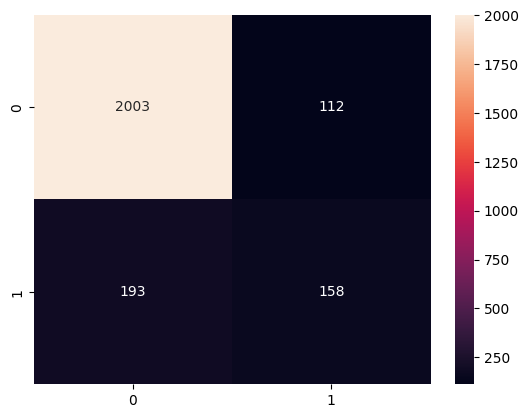

In [39]:
  sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = "d")

In [40]:
#find best threshold
# Lets optimize the threshold
best_score_knn = 0.01
for threshold in thresholds:
  y_pred = (mdlKnn.predict_proba(X_test)[:,1]>=threshold)
  # Call the roc_auc_score function
  roc = roc_auc_score(y_test, y_pred)
  if roc > best_score_knn:
    best_score_knn = roc
    best_threshold = threshold
print(f"Best threshold: {best_threshold}")
print(f"Best roc_auc_score: {best_score_knn}")

Best threshold: 0.11
Best roc_auc_score: 0.7706492089470813


<Axes: >

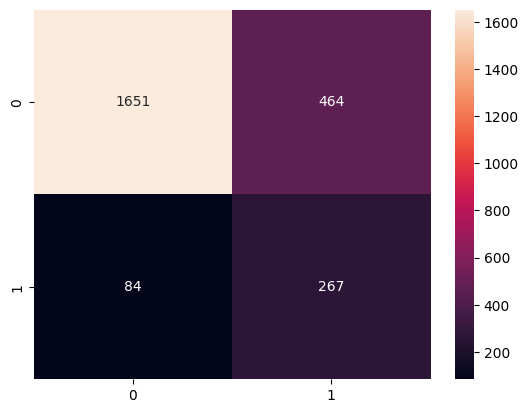

In [41]:
sns.heatmap(confusion_matrix(y_test, mdlKnn.predict_proba(X_test)[:,1]>=0.11), annot = True, fmt = "d")

# Support Vector Machines
While Logistic Regression and Naive Bayes are probabilistic models, Support Vector Machines try to create a boundary that maximize the margin between the different classes.

In [42]:
# Build Support Vector Machines - Classifier model

from sklearn.svm import SVC

mdlSvm = SVC()
mdlSvm.fit(X_train, y_train)
y_test_pred = mdlSvm.predict(X_test)

print ('Results (Support Vector Classifier):\n')

print ('Classification Report:')
print (classification_report(y_test, y_test_pred))

print ('AUC Score:')
best_score_svm = roc_auc_score(y_test, y_test_pred)
print (best_score_svm)

print(f"F-1 Score: {f1_score(y_test, y_test_pred)}")

Results (Support Vector Classifier):

Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.97      0.94      2115
        True       0.71      0.50      0.59       351

    accuracy                           0.90      2466
   macro avg       0.82      0.73      0.77      2466
weighted avg       0.89      0.90      0.89      2466

AUC Score:
0.7339273807358914
F-1 Score: 0.588628762541806


<Axes: >

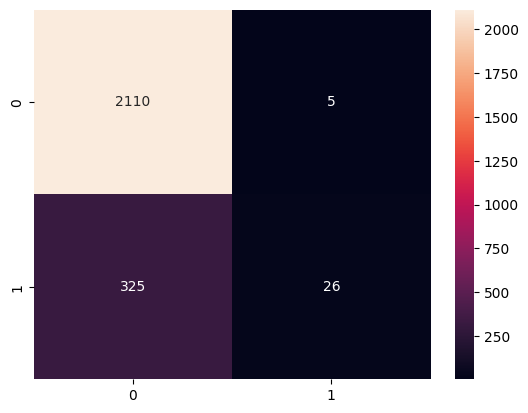

In [43]:
 sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = "d")

# Random Forest

In [78]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Define random forest model
mdlRfsMlb = RandomForestRegressor(random_state=1)

# Fit model
mdlRfsMlb.fit(X_train, y_train)

# Predict
y_test_pred = mdlRfsMlb.predict(X_test)

# Evaluate
print('MAE (Random Forest):')
print(mean_absolute_error(y_test,y_test_pred))
print ('AUC Score:')
best_score_rv = roc_auc_score(y_test, y_test_pred)
print (best_score_rv)

MAE (Random Forest):
0.1967477696674777
AUC Score:
0.8503538553526745


That's the best AUC score so far, let's perform cross-validation.

# Cross-Validation

Let's see which cross validation method performs better for this dataset.

In [58]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Define the model
model = RandomForestClassifier()

# Perform 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5)

print(f"Cross-validation scores: {scores}")
print(f"Average cross-validation score: {scores.mean()}")


Cross-validation scores: [0.91646391 0.89821573 0.89294404 0.88077859 0.88483374]
Average cross-validation score: 0.894647201946472


It looks like the basic cross-validation code I've used performs well on the given dataset. The output indicates that the model performs consistently well across all folds, with an average cross-validation score of approximately 0.894. This suggests that the RandomForestClassifier is likely a good fit for this dataset.

In [62]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier


# Define the model
model = RandomForestClassifier()

# Define stratified K-fold cross-validator
skf = StratifiedKFold(n_splits=5)

# Perform stratified K-fold cross-validation
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"Fold score: {score}")
print(f"Average cross-validation score: {scores.mean()}")

Fold score: 0.9197080291970803
Fold score: 0.9030819140308192
Fold score: 0.8949716139497161
Fold score: 0.8819951338199513
Fold score: 0.8856447688564477
Average cross-validation score: 0.894647201946472


 Stratified K-Fold cross-validation is useful when dealing with imbalanced datasets to ensure that each fold has a similar distribution of class labels. This approach helps in ensuring that the model evaluation is reliable and not biased by the distribution of the classes in the dataset. The scores indicate that the model is performing consistently well across the different folds.

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


# Define the model
model = RandomForestClassifier()

# Define parameter grid
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30]
}

# Define grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation score: {best_score}")

Best parameters: {'max_depth': 10, 'n_estimators': 100}
Best cross-validation score: 0.890813610516825


Hyperparameter tuning helps optimize the performance of a model by searching for the best combination of hyperparameters. This indicates that the optimal combination of hyperparameters for this model is max_depth=10 and n_estimators=100, resulting in a cross-validation score of approximately 0.8903.

In [65]:
best_model = RandomForestClassifier(max_depth=10, n_estimators=100)
best_model.fit(X, y)


RandomForestClassifier(max_depth=10)

In [67]:
test_score = best_model.score(X_test, y_test)
print(f"Test score: {test_score}")


Test score: 0.9290348742903487


 A test score of approximately 0.929 indicates that this model performs well on unseen data. So the hyperparameter tuning process was effective in finding a good combination of parameters for RandomForestClassifier.


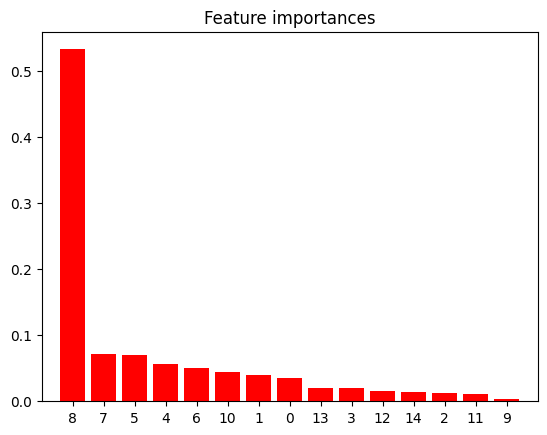

In [68]:
import matplotlib.pyplot as plt


# Get feature importances
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()


Here we can see that 8th feature in X is the most important data for our model with an outstanding score. Since X is a numpy array, we can't take the head but according to the manual research, 8th feature is "Page Values". So the average value for a web page that a user visited before completing an e-commerce transaction is the more important feature.

Remember the correlation heat map where Revenue had a high correlation with only "Page Values". So this graph also confirms it.

# Build Gradient Boosted Tree Model
Let's begin by training a simple Gradient Boosting model...

In [45]:
from xgboost import XGBRegressor

#Build and score default Gradient Boosting Model
mdlXgb = XGBRegressor()
mdlXgb.fit(X_train, y_train)
y_test_pred = mdlXgb.predict(X_test)
mae = mean_absolute_error(y_test_pred, y_test)

print("MAE from default XGBoost model:")
print(mae)

MAE from default XGBoost model:
0.14473861


Since the result is worse than Random Forest model, we'll tune the parameters according to the parameter tuning we did in class.

n_estimators: maximum number of decision trees that will be ensembled

max_depth: maximum depth of each tree (typically 3-10)

learning_rate: weight applied to each tree (typically 0.01-0.2)

In [46]:
#Build and score a tuned Gradient Boosting Model
mdlXgb = XGBRegressor(n_estimators=4000, learning_rate=0.01, max_depth=10)
mdlXgb.fit(X_train, y_train)
y_test_pred = mdlXgb.predict(X_test)
mae = mean_absolute_error(y_test_pred, y_test)

print("MAE from tuned XGBoost model:")
print(mae)

MAE from tuned XGBoost model:
0.13882801


In [47]:
print ('AUC Score:')
best_score_gboost = roc_auc_score(y_test, y_test_pred)
print (best_score_gboost)

AUC Score:
0.9096563011456629


Even though MAE score of gradient boosting model and random forest regressor is nearly the same, random forest performs slightly better.


In [48]:
models = ["Logistic Regression", "Naive Bayes", "KNN", "SVM", "Random Forest", "Gradient Boost"]
MAE = [best_score_lg,best_score_nb,best_score_knn,best_score_svm,best_score_rv,best_score_gboost]
comparison = pd.DataFrame(columns = ["Model", "MAE"])

Text(0.5, 1.0, 'Model Comparison')

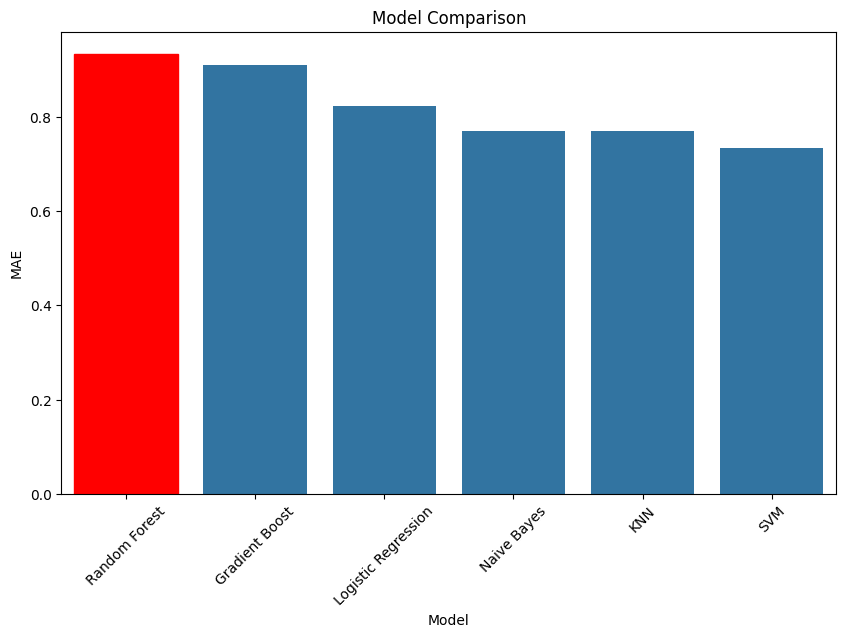

In [49]:
comparison["Model"] = models
comparison["MAE"] = MAE
comparison.sort_values(by = "MAE", inplace = True,ascending=False)
plt.figure(figsize=(10,6))
ax = sns.barplot(data = comparison, x = "Model", y = "MAE")
min_value = comparison["MAE"].min()
max_value = comparison["MAE"].max()
ax.patches[0].set_color('red')
plt.xlabel("Model")
plt.ylabel("MAE")
plt.xticks(rotation=45)
plt.title("Model Comparison")

Random Forest is the best model with best score, followed by gradient boost.

# Conclusion & Insights

In this dataset, we perform classification or clustering to predict the purchasing intention of online customers. The dataset was designed so that each session corresponds to a different user over a 1-year period, avoiding any bias towards specific campaigns, special days, user profiles, or periods. It includes 10 numerical and 8 categorical attributes, with the 'Revenue' attribute serving as the class label. I first explored the data by creating graps of each columns with thw relationships with each other and analyzed deeply a few that catched my eye. From the heatmap of correlations and feature importance graph, I found that "Page Values" had a significant importance on the Revenue, by exceeding the rest of the values by far. I decided that the "Weekend" and "Browser" columns are not significant, considering that these colud not pass the p-value test and had very low correlation to Revenue, which is < 0,05. There was not any missing values, so I did not have to handle it. I also could not find any categorical variable, hence I did not handle it as well.

For unbalanced datasets like this one, choosing the threshold value is crucial. The importance of the topic also significantly influences the threshold choice. I tried six methods in total, but there are many more possibilities. After that, I performed a cross-validation to evaluate the performance of a machine learning model and ensure that it generalizes well to unseen data. I divided the dataset into multiple folds and systematically trained and evaluated the model on different subsets. I also performed optimization to each method to see whether I could fine the best threshold, in the end, I was able to optimize the AUC score of most of the methods. I also created heatmaps before and after the optimization for each method, to see how the optimization changed the heatmap and to see if the optimization made the heatmap any better.

Among all the models tested, the random forest yielded the best results, achieving an AUC score of 93%. Random forest performs exceptionally well, especially with highly unbalanced data. Random forest is followed by gradient boost, logistic regression, naive bayes, KNN and SVM, respectively. Even though Random Forest and Gradient Boost had similar scores, as can be seen from both AUC scores and from the graph, Random Forest performs slightly better.

## Limitations & Potential Recommendations

This dataset has limitations as it primarily focuses on short-term user activity to determine if a given session will result in a purchase. However, it's important to recognize that a consumer's purchase intent may develop gradually and not immediately lead to a purchase. Additionally, traditional studies often analyze user behavior on a single e-commerce platform, while users typically utilize multiple services and switch between platforms when deciding which product to buy and where. Therefore, a cross-platform analysis of how user purchase intent evolves over time is missing. To address this, it is crucial to compare purchasing users with non-purchasing users and to identify how the online behavior of purchasers deviates from the norm over time as they approach a purchase. Tracking customers to see in which visit they make a purchase might contribute to the data. Also, most of the users do not make a purchase, so the website might focus to do sales, campaigns and maybe create a more user-friendly user-face to lead users to make a purchase.